# Project 2: Data Wrangling

### Step 1- Gathering Data
Import the libraries needed for this project, and then read the files needed for this project too.

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline

1. read the Twitter-archive-enhanced dataset into the pandas dataframe

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. download and upload the image-prediction file programmatically using the request library

In [3]:
# Make directory if it doesn't already exist
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

    url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(url)
    with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)
        

In [4]:
df_2 = pd.read_csv ('image-predictions.tsv', sep='\t')
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

In [5]:
tweet_ids = list(df_1['tweet_id'])

In [6]:
consumer_key = 'j3rUTv8HqIlXfW3PX48MSYbc9'
consumer_secret = 'VH0puPGzuVKnaBPoAWk7o9miKI2VsMZCjcx5UDW5Q8fbrWRIU9'
access_token = '1424230745149747203-IWdnhJmb1Ed91IwZdVlbUxjccuChc5'
access_secret = 'Faxi5zGV4jpvefQ71W9iI8nuQ54c0TTCZrXcyApHkmgLC'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [7]:
#import json
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
           
           json.dump(tweet._json, file)
            file.write('\n')
            
        except Exception as e:
            print(e)
            fails_dict[tweet_id] = e
            pass
print(fails_dict)

In [8]:
df_3=pd.read_json('tweet-json.txt', lines=True)
df_3

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Step 2: Assessing Data

In [9]:
df_1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [10]:
df_2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [11]:
df_3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [12]:
df_3.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [16]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
df_3.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [19]:
#make copies of datasets

twitter_archived_df=df_1.copy() 
image_df = df_2.copy()
tweet_json_df = df_3.copy()

### Quality issues

#### **df_1**
1. The column 'source' contains html tags
2. timestamp has wrong datatype
4. Drop all the irrelevant columns, eg retweet
5. Non descriptive column names
6. we do not need tweets from beyond August 1st 2017(2017-08-01)
7. extract the dog stage from the texts
8. some columns have their numbers in exponential format
9. the column 'source' contains html tags.

#### **df_3**
10. the column 'in_reply_to_status' has 2278 null values and wrong data type
11. the column 'in_reply_to_user_id' has 2278 null values and wrong data type
12. the column 'in_reply_to_user_id' has numbers in exponential format. the column is an id column


### Tidiness issues
1. Dog stage should form one column

2. Rating should form one column

## Cleaning Data

In [20]:
###we are going to extract the columns we need from the tweet_json dataframe
tweet_json_df_copy=df_3[['id', 'retweet_count', 'favorite_count', 'retweeted_status']]


In [21]:
# Merge the extracted columns from the tweet_json dataFrame to the twitter archived dataFrame
twitter_archived_df= twitter_archived_df.merge(tweet_json_df_copy,  how='inner', left_on = 'tweet_id', right_on = 'id')

In [22]:
#Merge the image data set to the twitter archived data set
twitter_archived_df= twitter_archived_df.merge(image_df,  how='inner', on = 'tweet_id')



In [23]:
twitter_archived_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #1: The column 'source' contains html tags

#### **Define**
* remove the html tag from the column source

#### **code**

In [24]:
# When we did our merge with the tweet_json dataset, some of the duplicate column names were renamed. source happens to be one
# of them so we first have to change back the name.
twitter_archived_df.rename(columns = {'source_x' : 'source'}, inplace = True)

In [25]:
i =  0
while i < len(twitter_archived_df['source']):
    rows = twitter_archived_df['source'][i].split(' ')[1]
    twitter_archived_df['source'][i] = rows[len("href=\""):]
    i += 1

C:\Users\USER\AppData\Local\Temp\ipykernel_7448\1972986985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['source'][i] = rows[len("href=\""):]


In [26]:
twitter_archived_df['source']

0       http://twitter.com/download/iphone"
1       http://twitter.com/download/iphone"
2       http://twitter.com/download/iphone"
3       http://twitter.com/download/iphone"
4       http://twitter.com/download/iphone"
                       ...                 
2068    http://twitter.com/download/iphone"
2069    http://twitter.com/download/iphone"
2070    http://twitter.com/download/iphone"
2071    http://twitter.com/download/iphone"
2072    http://twitter.com/download/iphone"
Name: source, Length: 2073, dtype: object

### Issue #2: timestamp has wrong datatype

#### **Define**

* change the datatype for datetime

#### **code**

In [27]:
twitter_archived_df['timestamp'] = pd.to_datetime(twitter_archived_df['timestamp'])

#### **test**

In [28]:
twitter_archived_df['timestamp'].dtypes

datetime64[ns, UTC]

### Issue #3: Multiple columns for dog stage

#### **define**
* make all dog stages to be in a single column

#### **code

In [29]:
#define a fuction to take the values from a column and update another column at the appropriate rows
def update_column(column_name, value, column_to_update):
    i = 0
    for rows in column_name:
        if rows == value:
            column_to_update[i] = value
        i += 1
    return

In [30]:
#set a new column 'dog_stage' to contain null values
twitter_archived_df['dog_stage'] = np.nan

In [31]:
#using the update_column function we defined, update the column dog_stage with the values from the columns doggo, puppo, floofer
#and pupper as appropriate
update_column(twitter_archived_df['pupper'], 'pupper', twitter_archived_df['dog_stage'])
update_column(twitter_archived_df['floofer'], 'floofer', twitter_archived_df['dog_stage'])
update_column(twitter_archived_df['doggo'], 'doggo', twitter_archived_df['dog_stage'])
update_column(twitter_archived_df['puppo'], 'puppo', twitter_archived_df['dog_stage'])

C:\Users\USER\AppData\Local\Temp\ipykernel_7448\2797704489.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_to_update[i] = value


#### **test**

In [32]:
twitter_archived_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone""",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"http://twitter.com/download/iphone""",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"http://twitter.com/download/iphone""",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"http://twitter.com/download/iphone""",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN


### Isssue #4: Rating Should form one column

#### **define**
* combine the numerator and denominator of the ratings and allocate an appropraite datatype

In [33]:
# First create a column with null values
twitter_archived_df['rating'] = np.nan
i = 0
while i < len(twitter_archived_df['rating']):
    twitter_archived_df['rating'][i] = str(twitter_archived_df['rating_numerator'][i])+ "/"+ str(twitter_archived_df['rating_denominator'][i])
    i += 1

C:\Users\USER\AppData\Local\Temp\ipykernel_7448\295120606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['rating'][i] = str(twitter_archived_df['rating_numerator'][i])+ "/"+ str(twitter_archived_df['rating_denominator'][i])


#### **test**

In [34]:
twitter_archived_df['rating']

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2068     5/10
2069     6/10
2070     9/10
2071     7/10
2072     8/10
Name: rating, Length: 2073, dtype: object

### Issue #5: remove the retweet columns

#### define
* remove the retweet column becasue it is not needed

#### code

In [35]:
# First we select the rows from the data set that are retweets
retweet = twitter_archived_df['retweeted_status'].notnull()
twitter_archived_df[retweet]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"http://twitter.com/download/iphone""",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True,NaN,13/10
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23+00:00,"http://twitter.com/download/iphone""",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,pupper,14/10
81,873697596434513921,NaN,NaN,2017-06-11 00:25:14+00:00,"http://twitter.com/download/iphone""",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,...,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,NaN,14/10
109,867072653475098625,NaN,NaN,2017-05-23 17:40:04+00:00,"http://twitter.com/download/iphone""",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True,NaN,13/10
129,861769973181624320,NaN,NaN,2017-05-09 02:29:07+00:00,"http://twitter.com/download/iphone""","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,...,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True,NaN,13/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,754874841593970688,NaN,NaN,2016-07-18 03:06:01+00:00,"http://twitter.com/download/iphone""",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,...,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False,NaN,11/10
775,752309394570878976,NaN,NaN,2016-07-11 01:11:51+00:00,"http://twitter.com/download/iphone""",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,...,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,NaN,13/10
1035,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"http://twitter.com/download/iphone""",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,...,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False,NaN,12/10
1977,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"http://twitter.com""",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,...,0.999335,False,vizsla,0.000081,True,collie,0.000069,True,NaN,12/10


In [36]:
# Create a list containing the index numbers of the rows to be dropped
list_of_rows = []
list_of_rows.append(twitter_archived_df[retweet].index.values)
list_of_rows

[array([  32,   67,   81,  109,  129,  133,  170,  171,  186,  209,  215,
         226,  229,  238,  263,  269,  270,  284,  318,  327,  331,  337,
         346,  355,  356,  361,  370,  374,  380,  390,  421,  428,  433,
         437,  439,  446,  449,  454,  458,  468,  472,  479,  480,  481,
         482,  483,  484,  485,  494,  502,  504,  509,  532,  535,  551,
         563,  578,  586,  597,  598,  610,  617,  620,  627,  646,  656,
         665,  685,  704,  708,  723,  727,  739,  742,  757,  775, 1035,
        1977, 1978], dtype=int64)]

In [37]:
for index in list_of_rows:
    twitter_archived_df.drop(index, axis=0, inplace=True)

### Issue #6: Drop all the irrelevant columns

#### define
* columns_to_drop = 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
  'retweeted_status_timestamp', 'id', 'retweeted_status', 'rating_numerator', 'rating_denominator','pupper', 'floofer', 'doggo', 'puppo'. 
  they are not really necessary for the analysis


#### code

In [38]:
# Create a list containing the names of columns to be dropped
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
'retweeted_status_timestamp', 'id', 'retweeted_status', 'rating_numerator', 'rating_denominator','pupper', 'floofer', 'doggo', 'puppo']
#use a for loop to drop the columns
for columns in columns_to_drop:
    twitter_archived_df.drop(columns, axis = 1, inplace = True)

In [39]:
twitter_archived_df

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone""",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,5/10
2069,666044226329800704,2015-11-16 00:04:52+00:00,"http://twitter.com/download/iphone""",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,6/10
2070,666033412701032449,2015-11-15 23:21:54+00:00,"http://twitter.com/download/iphone""",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,9/10
2071,666029285002620928,2015-11-15 23:05:30+00:00,"http://twitter.com/download/iphone""",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,7/10


### Issue #7: Non descriptive column names

#### define
* the following column names are not descriptive enough and should be changed to their pairs in the list
  p1: prediction_1
  p1_conf: confidence_1
  p1_dog: prediction_1_dog
  p2: prediction_2
  p2_conf: confidence_2
  p2_dog: prediction_2_dog
  p3: prediction_3
  p3_conf: confidence_3
  p3_dog: prediction_3_dog
  jpg_url: image_url
  img_num: image_num

#### code

In [40]:
twitter_archived_df = twitter_archived_df.rename(columns ={'p1': 'prediction_1', 'p1_conf': 'confidence_1', 'p1_dog': 'prediction_1_dog',
'p2': 'prediction_2', 'p2_conf': 'confidence_2', 'p2_dog': 'prediction_2_dog', 'p3': 'prediction_3', 'p3_conf': 'confidence_3',
'p3_dog': 'prediction_3_dog', 'jpg_url': 'image_url', 'img_num': 'image_num', 'rating':'dog_rating'})

In [41]:
twitter_archived_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,image_url,image_num,...,confidence_1,prediction_1_dog,prediction_2,confidence_2,prediction_2_dog,prediction_3,confidence_3,prediction_3_dog,dog_stage,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12/10


### Issue #8: we do not need tweets from beyond August 1st 2017(2017-08-01)

#### define

#### code

In [42]:
New = twitter_archived_df[twitter_archived_df['timestamp'] >= '2017-08-01']

In [43]:
New
# We can see that the only two results are from a few hours into August 1st 2017 so we can ignore them.

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,image_url,image_num,...,confidence_1,prediction_1_dog,prediction_2,confidence_2,prediction_2_dog,prediction_3,confidence_3,prediction_3_dog,dog_stage,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13/10


### Issue #9: extract the dog stage from the texts.

#### define

There are some missing dog stages i the dog_stage column for which the needed values are contained in the corresponding text columns. We want to extract these values from the texts and put them into their respective place.

#### code

In [44]:
# First extract the different types of stages from the dog_stage column
not_null = twitter_archived_df['dog_stage'].notnull()
#looping through the resulting list of dog_stage, perform a check in each text entry to see whether any of the stages is present.
#if it is present then add it to the corresponding dog_stage column. same row.
for stage in twitter_archived_df['dog_stage'][not_null].unique():
    i = 0
    for text in twitter_archived_df['text']:
        if stage in text:
            twitter_archived_df['dog_stage'][i] = stage
        i += 1

C:\Users\USER\AppData\Local\Temp\ipykernel_7448\2589397087.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['dog_stage'][i] = stage
C:\Users\USER\AppData\Local\Temp\ipykernel_7448\2589397087.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['dog_stage'][i] = stage
C:\Users\USER\AppData\Local\Temp\ipykernel_7448\2589397087.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_d

In [45]:
twitter_archived_df

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,image_url,image_num,...,confidence_1,prediction_1_dog,prediction_2,confidence_2,prediction_2_dog,prediction_3,confidence_3,prediction_3_dog,dog_stage,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone""",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,5/10
2069,666044226329800704,2015-11-16 00:04:52+00:00,"http://twitter.com/download/iphone""",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,6/10
2070,666033412701032449,2015-11-15 23:21:54+00:00,"http://twitter.com/download/iphone""",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,9/10
2071,666029285002620928,2015-11-15 23:05:30+00:00,"http://twitter.com/download/iphone""",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,7/10


### Issue #10: some columns have their numbers in exponential format.

#### define
confidence_2 and confidence_3 are supposed to be representations in percentages of the confidence levels of the ai's predictions about the dogs pictures. the numbers have been formatted in exponentials. we should correct this.

#### code

In [46]:
i = 0
for rows in twitter_archived_df['confidence_2']:
    twitter_archived_df['confidence_2'][i] = format(rows, '.10f')
    i += 1
i = 0
for rows in twitter_archived_df['confidence_3']:
    twitter_archived_dfs['confidence_3'][i] = format(rows, '.10f')
    i += 1

C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['confidence_2'][i] = format(rows, '.10f')
C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['confidence_2'][i] = format(rows, '.10f')
C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['confidence_2'][i] = format(rows, '.10f')
C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['confidence_2'][i] = format(rows, '.10f')
C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['confidence_2'][i] = format(rows, '.10f')
C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['confidence_2'][i] = format(rows, '.10f')
C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['confidence_2'][i] = format(rows, '.10f')
C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archived_df['confidence_2'][i] = format(rows, '.10f')
C:\Users\USER\AppData\Local\Temp\ipykernel_7448\3176958036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

NameError: name 'twitter_archived_dfs' is not defined

#### test

In [47]:
twitter_archived_df

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,image_url,image_num,...,confidence_1,prediction_1_dog,prediction_2,confidence_2,prediction_2_dog,prediction_3,confidence_3,prediction_3_dog,dog_stage,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.0858511000,False,banana,0.076110,False,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.0906465000,True,papillon,0.068957,True,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.0782530000,True,kelpie,0.031379,True,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.1680860000,True,spatula,0.040836,False,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.2257700000,True,German_short-haired_pointer,0.175219,True,NaN,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone""",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,5/10
2069,666044226329800704,2015-11-16 00:04:52+00:00,"http://twitter.com/download/iphone""",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,6/10
2070,666033412701032449,2015-11-15 23:21:54+00:00,"http://twitter.com/download/iphone""",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,9/10
2071,666029285002620928,2015-11-15 23:05:30+00:00,"http://twitter.com/download/iphone""",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,7/10


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
twitter_archived_df.to_csv('Twitter_archive_master.csv', index = False, encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. According to the first prediction of the neural network, golden_retriever is the most comon breed of dogs while Labrador retriever occupies this position in the second and third predictions

2. the most common dog stage is "Pupper"

3. With the exception of 'a' and 'the, Charlie, Lucy, Cooper, Oliver, Penny, Tucker, Sadie, Winston, Toby, Daisy, Lola are the 10 most common dog names

### Visualization

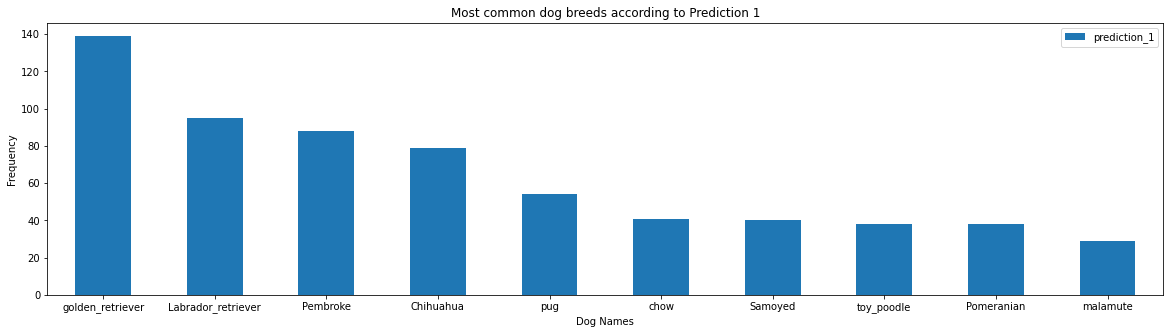

In [49]:
twitter_archived_df['prediction_1'].value_counts()[:10].plot(kind = 'bar', figsize = (20,5), rot = 0);
plt.xlabel('Dog Names');
plt.ylabel('Frequency');
plt.title('Most common dog breeds according to Prediction 1')
plt.legend();

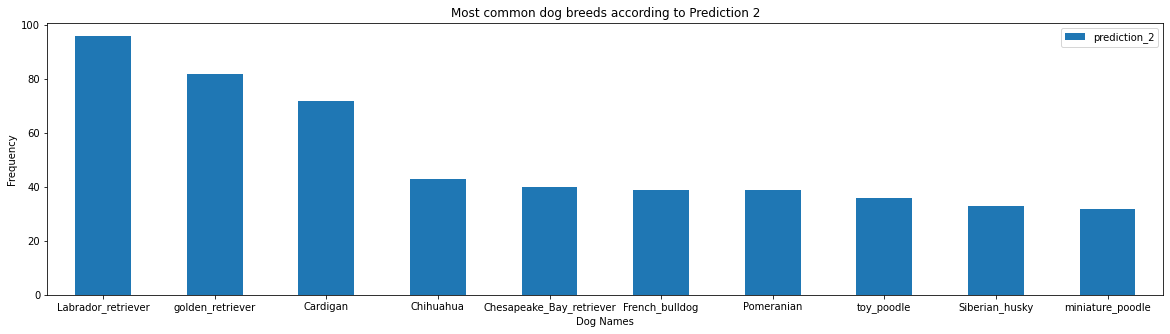

In [50]:
twitter_archived_df['prediction_2'].value_counts()[:10].plot(kind = 'bar', figsize = (20,5), rot = 0);
plt.xlabel('Dog Names');
plt.ylabel('Frequency');
plt.title('Most common dog breeds according to Prediction 2')
plt.legend();

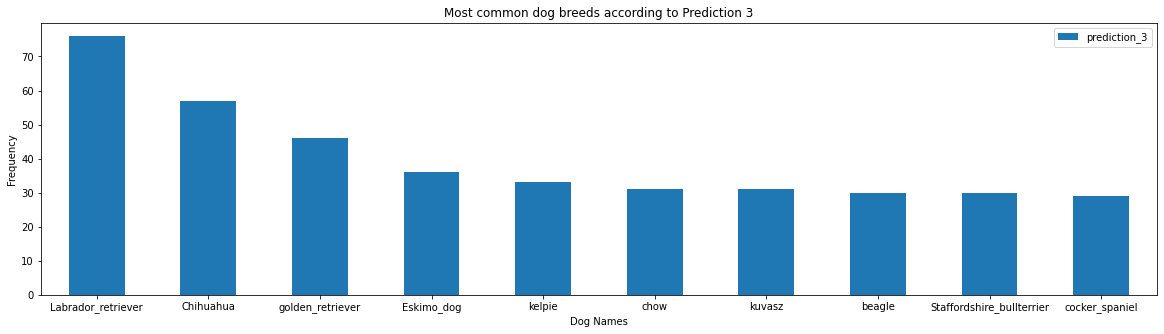

In [51]:
twitter_archived_df['prediction_3'].value_counts()[:10].plot(kind = 'bar', figsize = (20,5), rot = 0);
plt.xlabel('Dog Names');
plt.ylabel('Frequency');
plt.title('Most common dog breeds according to Prediction 3')
plt.legend();

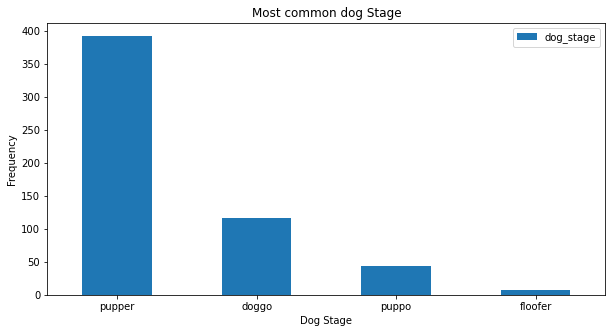

In [52]:
twitter_archived_df['dog_stage'].value_counts().plot(kind = 'bar', figsize = (10,5), rot = 0);
plt.xlabel('Dog Stage');
plt.ylabel('Frequency');
plt.title('Most common dog Stage')
plt.legend();

In [53]:
twitter_archived_df['dog_stage'].value_counts()

pupper     392
doggo      117
puppo       44
floofer      8
Name: dog_stage, dtype: int64

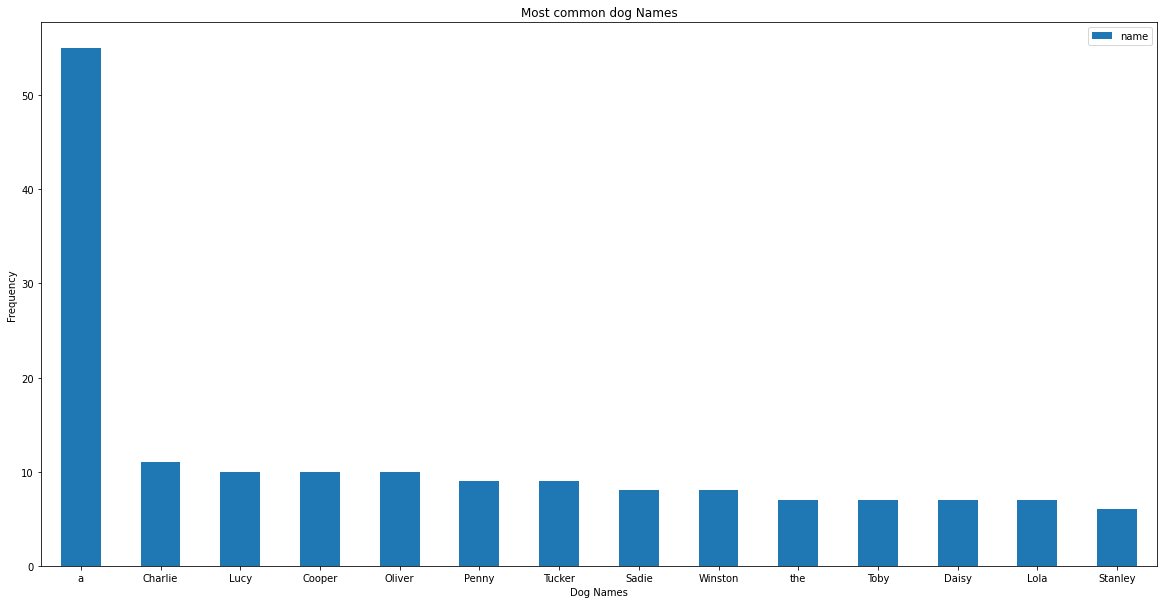

In [54]:
twitter_archived_df['name'].value_counts()[1:15].plot(kind = 'bar', figsize =(20,10), rot = 0);
plt.xlabel('Dog Names');
plt.ylabel('Frequency');
plt.title('Most common dog Names')
plt.legend();